In [1]:
import pandas as pd
file_name = "result_mat.csv"
df_data = pd.read_csv(file_name, sep=',', index_col=None)
print ("The size of the Math dataset :", df_data.shape)
df_data.head(2).append(df_data.tail(2))

The size of the Math dataset : (395, 61)


C:\Users\29002\AppData\Local\Temp\ipykernel_51372\1662012340.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_data.head(2).append(df_data.tail(2))


,Unnamed: 0,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Finalc
0,0,1,0,1,0,0,1,1,0,1,...,3,4,1,1,3,6,5,6,6,2
1,1,1,0,1,0,0,1,1,0,0,...,3,3,1,1,3,4,5,5,6,2
393,393,0,1,0,1,1,0,0,1,0,...,4,1,3,4,5,0,11,12,10,7
394,394,0,1,0,1,0,1,0,1,0,...,2,3,3,3,5,5,8,9,9,6


In [3]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df_data, test_size=0.2, random_state=25)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 316
No. of testing examples: 79


In [4]:
print(type(training_data))

<class 'pandas.core.frame.DataFrame'>


In [5]:
training_data.to_csv("training_data.csv", index=False)

In [6]:
testing_data.to_csv("testing_data.csv", index=False)

In [3]:

train_df_data = pd.read_csv("training_data.csv", sep=',', index_col=None)



C:\Users\29002\AppData\Local\Temp\ipykernel_51372\2359345046.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df_data.head(2).append(train_df_data.tail(2))


,Unnamed: 0,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Finalc
0,125,1,0,0,1,0,1,1,0,0,...,5,5,3,2,5,0,13,13,12,5
1,205,1,0,1,0,0,1,1,0,0,...,4,3,3,4,5,28,10,9,9,7
314,318,1,0,1,0,1,0,1,0,0,...,3,4,2,5,5,0,11,11,10,7
315,132,1,0,1,0,0,1,0,1,0,...,4,4,1,3,5,12,10,13,12,4


In [4]:
train_df_data = train_df_data.drop(columns=['Unnamed: 0', 'school_MS','sex_M','address_R','famsize_GT3','Pstatus_A','schoolsup_no','famsup_no','paid_no','activities_no','nursery_no','higher_no','internet_no','romantic_no'])

In [7]:
X_train=train_df_data.drop(columns=['G3'])
Y_train=train_df_data['G3']

In [10]:
test_df_data = pd.read_csv("testing_data.csv", sep=',', index_col=None)
test_df_data = test_df_data.drop(columns=['Unnamed: 0', 'school_MS','sex_M','address_R','famsize_GT3','Pstatus_A','schoolsup_no','famsup_no','paid_no','activities_no','nursery_no','higher_no','internet_no','romantic_no'])
X_test=test_df_data.drop(columns=['G3'])
Y_test=test_df_data['G3']

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

clf = DecisionTreeRegressor(random_state=42)
grid_cv = GridSearchCV(estimator=clf,param_grid=param_grid).fit(X_train, Y_train)
print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)

Param for GS {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
CV score for GS 0.8329397869841451


In [71]:
clf.fit(X_train, Y_train)
y_testO =clf.predict(X_test)

In [45]:
y_trainP =grid_cv.predict(X_train)
y_testP = grid_cv.predict(X_test)

In [73]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_test,y_testO))
print(mean_squared_error(Y_test,y_testP))

4.734177215189874
3.3411077066648756


In [68]:
from sklearn.tree import export_graphviz

dot_data = export_graphviz(grid_cv.best_estimator_, out_file=None, 
            filled=True, rounded=True, class_names=['0','1','2'],feature_names=X_test.columns)


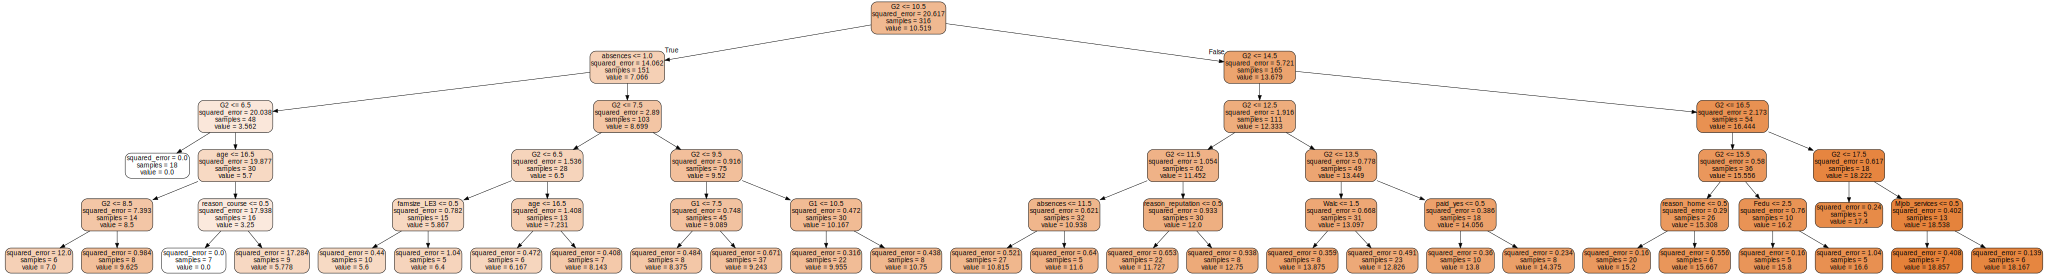

In [69]:
from graphviz import Source
Source(dot_data)

In [1]:
graph = Source(dot_data )
graph.format = 'png'
graph.render('dtree_render',view=True)

NameError: name 'Source' is not defined